In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

# MLB DATA ANALYSIS #

## Authors: Dylan Andrews, Garrett Brown, James Estey, Joseph Madigan, Madden Kline, Nathan Miller ##

# Introduction/Background: #

There are a multitude of factors that contribute to what makes a player strong enough to make it to the major leagues of any sport. However, there are many factors that separate out players even once they have made it. In the MLB, there are a multitude of factors that seem capable of being strong predictors of a player. As a player ages, you might expect them to become a weaker player strength wise, but strong mentally. You would expect to see that higher paid players perform better than those on lower contract values. Position played even seems to dictate the strengths of a player. But does the data actually alighn with this? We wanted to analyze a few stats that gave a broad idea of the strength of a player, and compare it to these variables.

# Data #

where were datasets obtained, where, and what did we do to the data

In [4]:
contract_df = pd.read_csv('2025_contract_avg.csv')
show(contract_df)

Loading ITables v2.5.2 from the internet... (need help?)


This dataset simply looks at the contract average per year of all MLB players as of 2025. Contract average is a useful metric as it takes into account the full contract value, not just the amount being paid out per year. This accounts for players like Shohei Ohtani, who despite having a 700 million dollar contract, has deferred it and only gets paid 2 million per year. A value like contract average takes this into account, and still shows that he is in fact the highest paid player currently in the MLB. This data was obtained from spotrac.com, looking at their list of MLB Contract Average Rankings list. It was cleaned to just names and salaries, where we then added a categorical description of the salary range for extra clarity.

In [5]:
plus_df = pd.read_csv('plusstats.csv')
show(plus_df)

Loading ITables v2.5.2 from the internet... (need help?)


This dataset looks at 3 main batting stats for MLB players, in their + form, which takes into account park factors, since some parks pose advantages based on their weather conditions, but also due to non-standard outfields. These stats are then normalized so that 100 is the league average, meaning any players above 100 are stronger than average, and below are weaker. OBP+ looks at the on-base percentage of a player, to determine how consistently they either walk or hit to get on base. SLG+ looks at the power of their hits, determinig the strength of their at-bats, not just successful hits. Finally, wRC+ looks at runs created for their team, looking at not just things like home runs, but also runs batted in, and even things like sacrifice pop-outs.

# Initial Exploration #

what did we do initially to analyze the dataset and get ideas?

(probably just do some value counts and such here)

also probably talk about how we decided what stats were good determiners here

# Proposed Questions #

1. How does age affect quality of player?
2. How does salary affect quality of player?
3. How does position affect quality of player?

# Analysis and Results #
just start dumping stuff in here, we can clean and explain later

## Salary ##

In [6]:
# Just merging the plus and salary dataframes for easier graphing
df_plussal = pd.merge(plus_df, contract_df, on = 'Name', how = 'left')

# Defining the order of categories to call on later for easier visuals
desired_order = ['<1M', '1 - 10M', '10 - 20M', '20 - 30M', '30 - 40M', '40 - 50M', '>50M']

### Salary vs. OBP+ ###

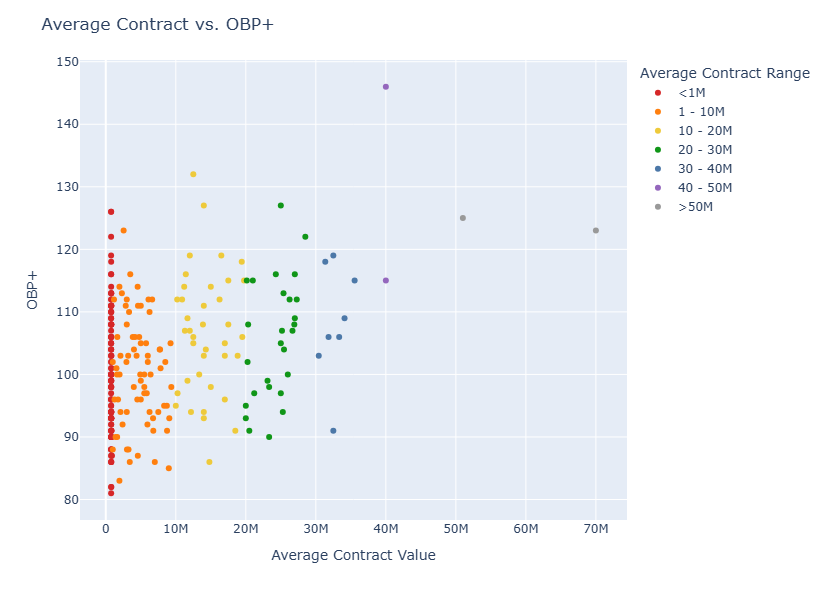

In [7]:
fig = px.scatter(df_plussal,
                 x = 'Salary',
                 y = 'OBP+',
                 color = 'salcat',
                 category_orders={'salcat': desired_order},
                 color_discrete_sequence = (['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']),
                 hover_data = 'Name')

fig.update_layout(width = 800,
                  height = 600,
                  legend_title = 'Average Contract Range',
                  title = 'Average Contract vs. OBP+',
                  xaxis_title = 'Average Contract Value')

fig.show()

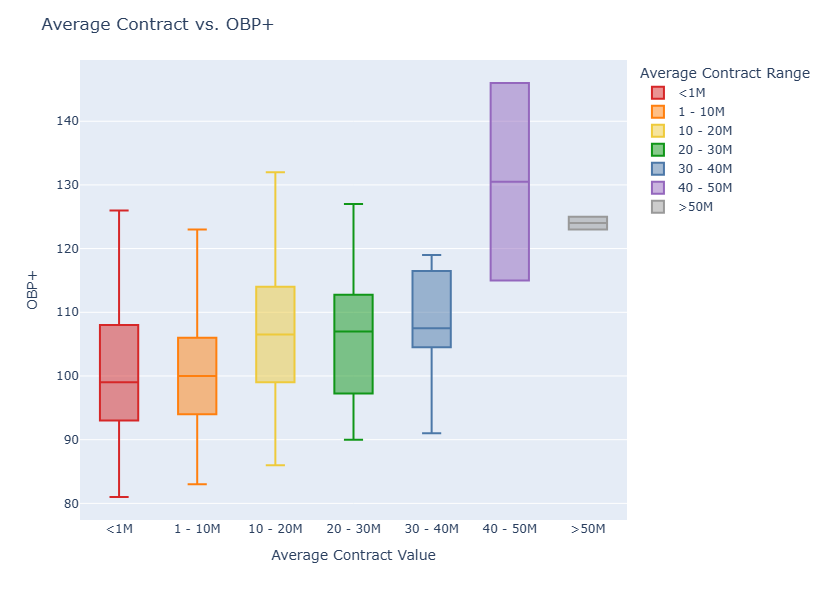

In [8]:
fig = px.box(df_plussal,
             x = 'salcat',
             y = 'OBP+',
             color = 'salcat',
             category_orders={'salcat': desired_order},
             color_discrete_sequence = (['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']))

fig.update_layout(width = 800,
                  height = 600,
                  legend_title = 'Average Contract Range',
                  title = 'Average Contract vs. OBP+',
                  xaxis_title = 'Average Contract Value')


fig.show()

Here we can see that there does appear to be some increase in average and median OBP+ on the basis of salary. It is clearly present at the very upper end, where the OBP+ of 40+ million players does sit clearly higher than the rest, but there appears to be fairly marginal changes on the lower ends. This is also not free from the fact that there are far fewer players on the upper end of contract values, meaning we can't certainly say that they are not outliers.

### Salary vs. SLG+ ###

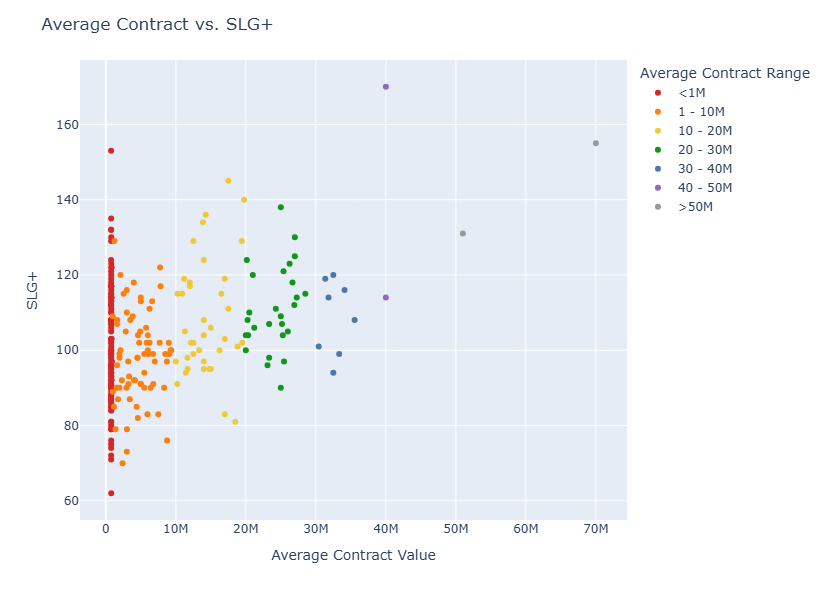

In [9]:
fig = px.scatter(df_plussal,
                 x = 'Salary',
                 y = 'SLG+',
                 color = 'salcat',
                 category_orders={'salcat': desired_order},
                 color_discrete_sequence = (['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']),
                 hover_data = 'Name')

fig.update_layout(width = 800,
                  height = 600,
                  legend_title = 'Average Contract Range',
                  title = 'Average Contract vs. SLG+',
                  xaxis_title = 'Average Contract Value')

fig.show()

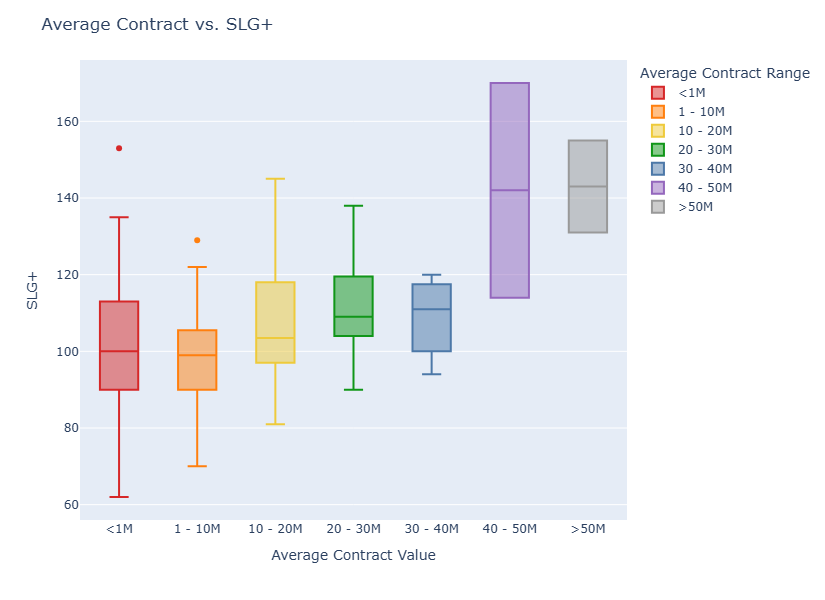

In [10]:
fig = px.box(df_plussal,
             x = 'salcat',
             y = 'SLG+',
             color = 'salcat',
             category_orders={'salcat': desired_order},
             color_discrete_sequence = (['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']))

fig.update_layout(width = 800,
                  height = 600,
                  legend_title = 'Average Contract Range',
                  title = 'Average Contract vs. SLG+',
                  xaxis_title = 'Average Contract Value')


fig.show()

Here there is a much more notable increase on the lower end of SLG+ as salary increases. Aside from <1M vs 1-10M, the median increases as the salary range increases. While the spreads of these points suggests that it is not guaranteed that a higher paid player hits harder, it does seem to play some partial role in its prediction.

### Salary vs. wRC+ ###

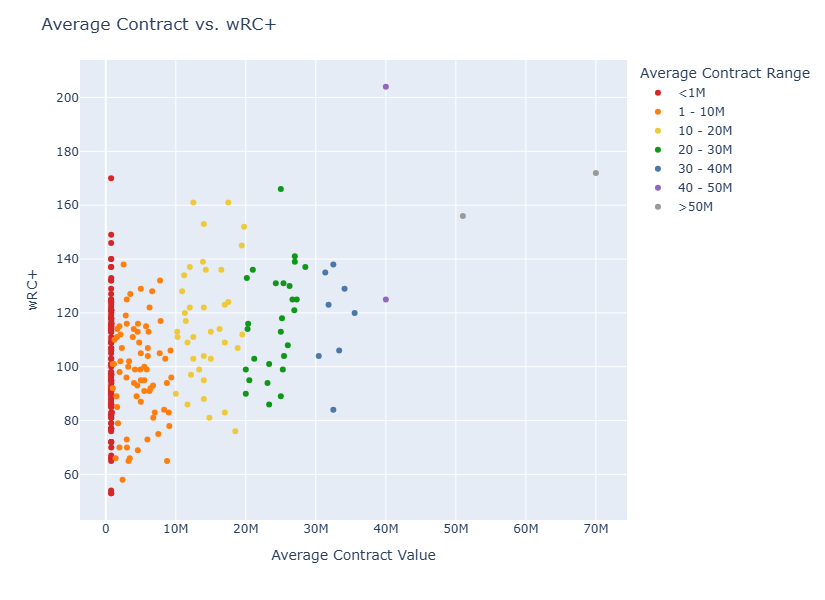

In [11]:
fig = px.scatter(df_plussal,
                 x = 'Salary',
                 y = 'wRC+',
                 color = 'salcat',
                 category_orders={'salcat': desired_order},
                 color_discrete_sequence = (['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']),
                 hover_data = 'Name')

fig.update_layout(width = 800,
                  height = 600,
                  legend_title = 'Average Contract Range',
                  title = 'Average Contract vs. wRC+',
                  xaxis_title = 'Average Contract Value')

fig.show()

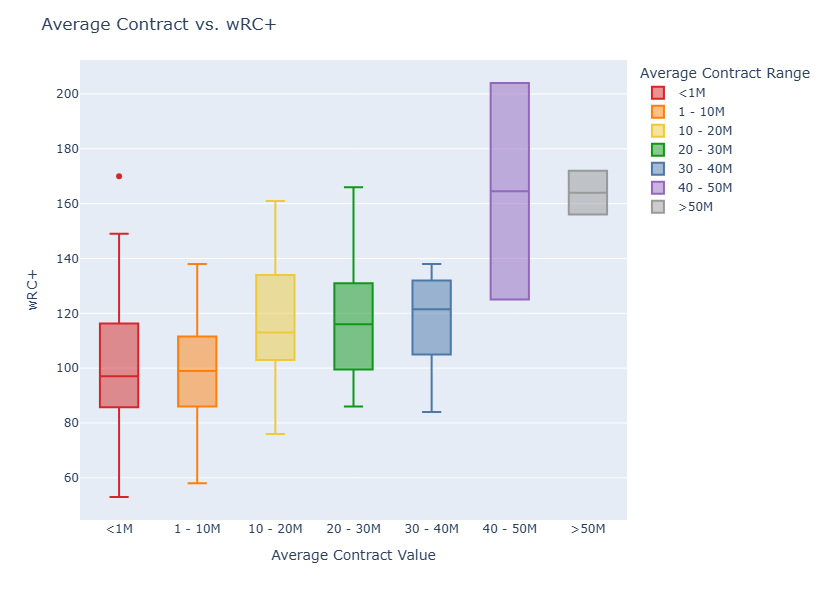

In [12]:
fig = px.box(df_plussal,
             x = 'salcat',
             y = 'wRC+',
             color = 'salcat',
             category_orders={'salcat': desired_order},
             color_discrete_sequence = (['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']))

fig.update_layout(width = 800,
                  height = 600,
                  legend_title = 'Average Contract Range',
                  title = 'Average Contract vs. wRC+',
                  xaxis_title = 'Average Contract Value')


fig.show()

With wRC+, there also appears to be a morderate increase in the range of values as you move up the salary ranges. Once again a 30-40M player is far from guaranteed to have a higher wRC+ compared to a 20-30M player, but they do seem significantly better than <10M player.

## Position ##

In [13]:
df_stats = pd.read_csv("plusstats.csv")
df_extra = pd.read_csv("output.csv")
# Merging datasets to get Position with the plus stats
df_merged = df_stats.merge(
    df_extra[['Player', 'Pos']],
    left_on='Name',
    right_on='Player',
    how='left'
)
df_merged = df_merged.drop(columns=['Player'])
df_merged = df_merged.drop_duplicates(subset='Name', keep='first')
show(df_merged)

Loading ITables v2.5.2 from the internet... (need help?)


### Position vs OBP+ ###

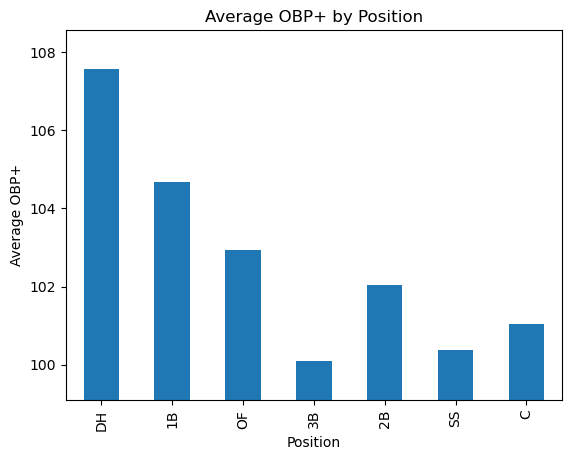

In [15]:
avg_obp = df_merged.groupby('Pos')['OBP+'].mean()
order = ['DH', '1B','OF','3B', '2B', 'SS', 'C']
avg_obp = avg_obp.reindex(order)
plt.figure()
avg_obp.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Average OBP+')
plt.title('Average OBP+ by Position')
plt.ylim(avg_obp.min() - 1, avg_obp.max() + 1)
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_8004\1042112736.py:10: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



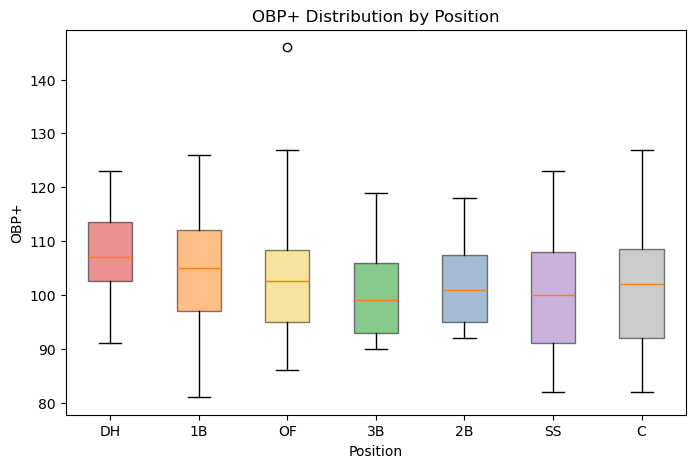

In [26]:
order = ['DH', '1B', 'OF', '3B', '2B', 'SS', 'C']
colors = ['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']

df_plot = df_merged[df_merged['Pos'].isin(order)].copy()
data = [df_plot[df_plot['Pos'] == pos]['OBP+'] for pos in order]

plt.figure(figsize=(8,5))
box = plt.boxplot(data, labels=order, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

plt.xlabel('Position')
plt.ylabel('OBP+')
plt.title('OBP+ Distribution by Position')
plt.show()

Here we can see the rate at which each position gets on base. I ordered the positions from left to right by their defensive focus, so we should generally expect a decrease in productivity from right to left, given how much time each position spends practicing solely on offense. We see that this pattern generally holds, except at third base, which has a lower on-base rate given its typically high offensive focus.

### Position vs SLG+ ###

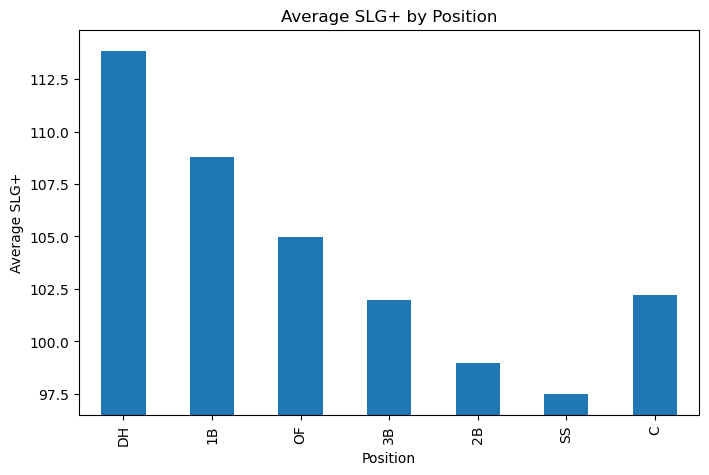

In [27]:
avg_slg = df_merged.groupby('Pos')['SLG+'].mean()
order = ['DH', '1B','OF','3B', '2B', 'SS', 'C']
avg_slg = avg_slg.reindex(order)
plt.figure(figsize=(8,5))
avg_slg.plot(kind='bar', color='#1f77b4')
plt.xlabel('Position')
plt.ylabel('Average SLG+')
plt.title('Average SLG+ by Position')
plt.ylim(avg_slg.min() - 1, avg_slg.max() + 1)
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_8004\2478539544.py:8: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



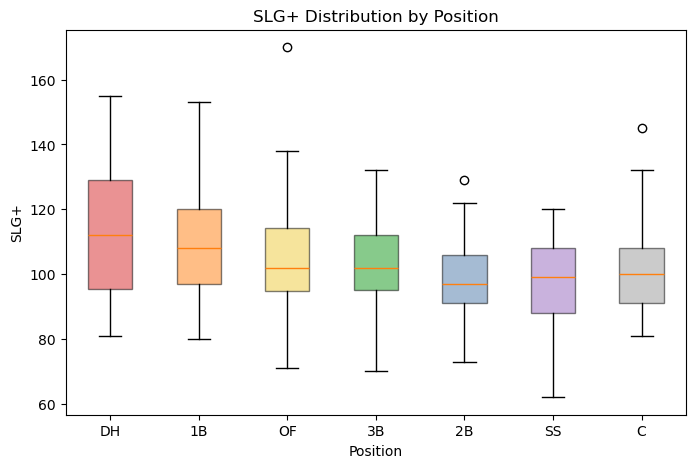

In [28]:
order = ['DH', '1B', 'OF', '3B', '2B', 'SS', 'C']
colors = ['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']

df_plot = df_merged[df_merged['Pos'].isin(order)].copy()
data = [df_plot[df_plot['Pos'] == pos]['SLG+'] for pos in order]

plt.figure(figsize=(8,5))
box = plt.boxplot(data, labels=order, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

plt.xlabel('Position')
plt.ylabel('SLG+')
plt.title('SLG+ Distribution by Position')
plt.show()

Here we can see that SLG+ follows the expected pattern slightly better, with third base having a higher SLG+ relative to their OBP+ above. We also see catchers having a high SLG+ given how demanding their defensive position is.

### Position vs wRC+ ###

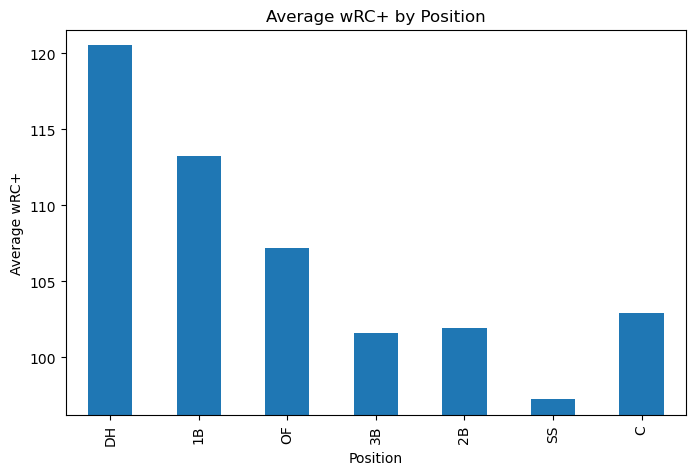

In [29]:
avg_wrc = df_merged.groupby('Pos')['wRC+'].mean()
order = ['DH', '1B','OF','3B', '2B', 'SS', 'C']
avg_wrc = avg_wrc.reindex(order)
plt.figure(figsize=(8,5))
avg_wrc.plot(kind='bar', color='#1f77b4')
plt.xlabel('Position')
plt.ylabel('Average wRC+')
plt.title('Average wRC+ by Position')
plt.ylim(avg_wrc.min() - 1, avg_wrc.max() + 1)
plt.show()

C:\Users\natha\AppData\Local\Temp\ipykernel_8004\751098730.py:8: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



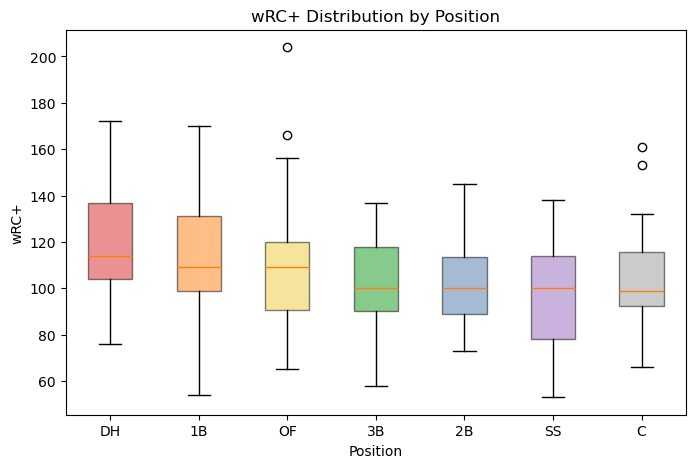

In [30]:
order = ['DH', '1B', 'OF', '3B', '2B', 'SS', 'C']
colors = ['#D62728', '#FF7F0E', '#EECA3B', '#109618', '#4C78A8', '#9467BD', '#999999']

df_plot = df_merged[df_merged['Pos'].isin(order)].copy()
data = [df_plot[df_plot['Pos'] == pos]['wRC+'] for pos in order]

plt.figure(figsize=(8,5))
box = plt.boxplot(data, labels=order, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)

plt.xlabel('Position')
plt.ylabel('wRC+')
plt.title('wRC+ Distribution by Position')
plt.show()

wRC+ follows the expected pattern well, with third base and shortstop being slightly lower than one might expect, and catcher being relatively high. Overall, there is a clear pattern: the less time a player needs to spend on defense, the more productive they are offensively.

# Conclusion #
what did we find made a difference, what didn't?